In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [48]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

In [49]:
df = pd.read_csv('2015.csv',sep=',')

In [50]:
print(df.shape)

(158, 12)


In [51]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [52]:
df.info()
# что видим?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

# Гистограммы

<AxesSubplot:title={'center':'Распределение оценки счастья'}, ylabel='Frequency'>

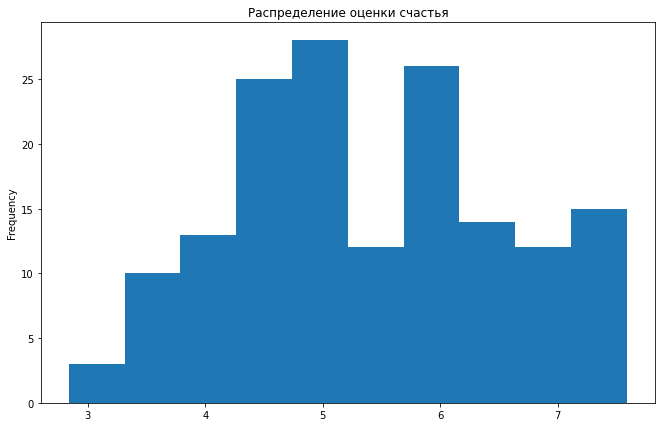

In [53]:
# распределение оценок пользователей
df['Happiness Score'].plot(kind='hist', 
                   title='Распределение оценки счастья', bins=10)

Наиболее частые оценки счастья 6 и 5


## Столбчатая диаграмма

In [54]:
# средний балл счастья в разрезе региона
score_by_region = df[['Happiness Score', 'Region']].groupby('Region').mean()
score_by_region

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


<AxesSubplot:title={'center':'Уровень счастья по регионам'}, xlabel='Регион', ylabel='Средний балл в регионе'>

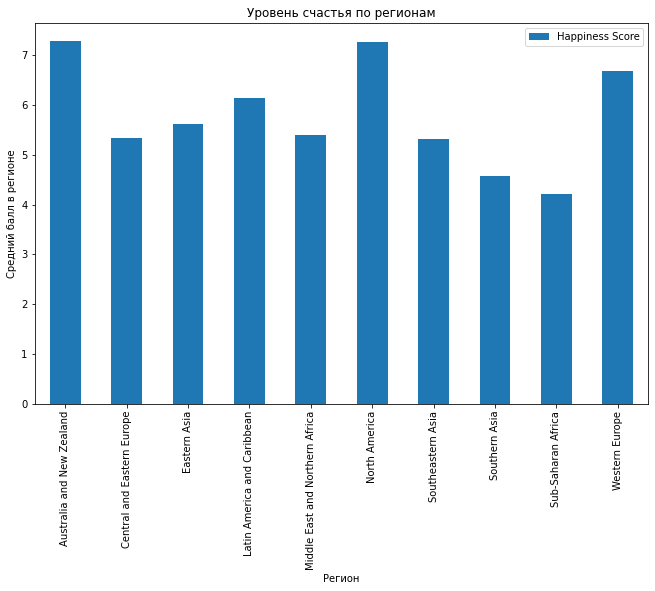

In [55]:
score_by_region.plot(kind='bar', 
                                                                  title='Уровень счастья по регионам',
                                                                  xlabel='Регион',
                                                                  ylabel='Средний балл в регионе')

В 2015 году топ три региона по уровню счастья Австралия и Новая Зеландия, Северная Америки и Западная Европа.

# <center> Seaborn

In [56]:
import seaborn as sns

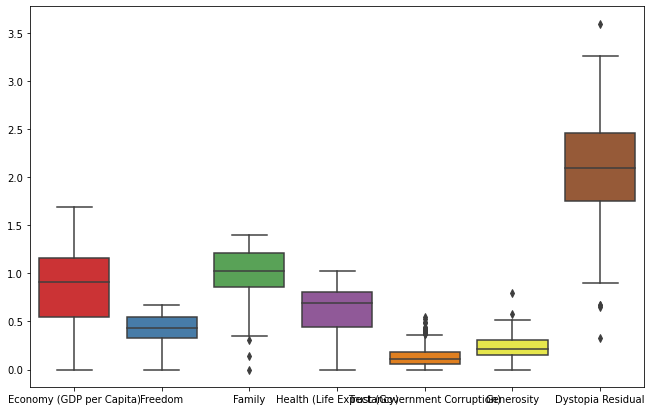

In [57]:
list_features = ["Economy (GDP per Capita)", "Freedom", "Family", "Health (Life Expectancy)","Trust (Government Corruption)","Generosity",'Dystopia Residual']
sns.boxplot(data = df.loc[:, list_features], orient = "v", palette = "Set1")
plt.show()

Медиана у показателя искоренения деспотии наибольшая,этот показатель играет бОльшую роль в уровне счастья, наименьшая медиана и разброс у уровня доверия государству

In [89]:
 y = np.quantile(df.loc[:, "Freedom"],0.05)
y

0.17047400000000001

In [90]:
c = np.quantile(df.loc[:, "Freedom"],0.95)
c

0.6415879999999999

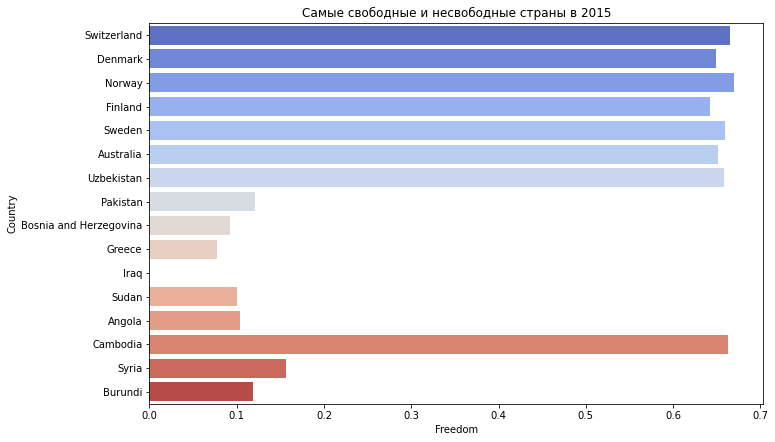

In [91]:
df2 = df[(df.loc[:, "Freedom"] > c) | (df.loc[:, "Freedom"] < y)]
sns.barplot(x = "Freedom", y = "Country", data = df2, palette = "coolwarm")
plt.title("Cамые свободные и несвободные страны в 2015")
plt.show()

На графике красным те страны, которые по уровню свободы ниже 95% остальных стран, синим - страны с показателем входящим в 5% самых высоких покзаателей

In [69]:
df[df['Country']=='Russia']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
63,Russia,Central and Eastern Europe,64,5.716,0.03135,1.13764,1.23617,0.66926,0.36679,0.03005,0.00199,2.27394


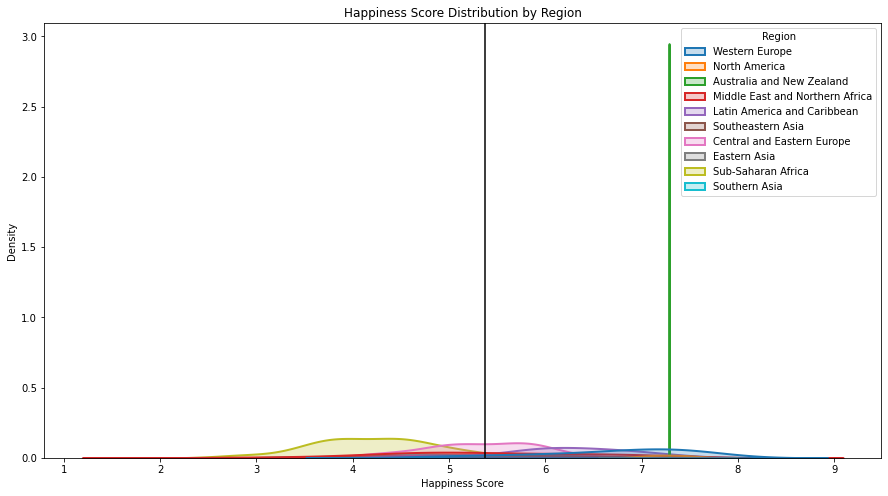

In [76]:
plt.figure(figsize=(15,8))
sns.kdeplot(df["Happiness Score"], hue=df["Region"], fill=True, linewidth=2)
plt.axvline(df["Happiness Score"].mean(), c="black")
plt.title("Happiness Score Distribution by Region")
plt.show()

Чёрная Африка (Африка к югу от Сахары, Тропическая Африка; англ. Sub-Saharan Africa, сокращённо SSA, Africa South of the Sahara, Black Africa, Dark Africa) по уровню счастья медианно ниже остальных